Put your news signals API keys in the cell below to run the news queries.

In [ ]:
NEWSAPI_APP_KEY = ""
NEWSAPI_APP_ID = ""

In [24]:
PUBLISHED_START = "2023-01-01T00:00:00.000Z"
PUBLISHED_END = "2023-12-31T23:59:59.999Z"

Python library imports for this notebook, incase you want to run a particular cell block separetely (provided it doesnt have past variable dependencies)

In [26]:
import pandas as pd
import re
import news_signals
import requests
import json
import matplotlib.pyplot as plt

Here we load the csv file of entity labels that we got in *wikidata_traversal.ipynb* and convert them to a list

In [15]:
file_path = "labels_dict.csv"
df = pd.read_csv(file_path)

label_values = df["Label"].dropna().tolist()  # Drop NaN values if any
label_values = [re.sub(r'[^a-zA-Z0-9 ]', '', label.lower()) for label in label_values]  # Keep spaces, remove special chars

print(label_values)


['kingston', 'azure musk', 'xcom', 'the boring company', 'templateelon musk', 'university of pretoria', 'shivon zilis', 'alexandra musk', 'asha rose musk', 'x', 'musk family', 'the wharton school', 'nevada musk', 'elon musks tesla roadster', 'unknown', 'waterkloof house preparatory school', 'united states of america', 'strider musk', 'spacex', 'jana bezuidenhout', 'x  a musk', 'smith school of business', 'kai musk', 'tau musk', 'tesla inc', 'south africa', 'bryanston high school', 'neuralink', 'talulah riley', 'canada', 'x holdings i inc', 'damian musk', 'categoryelon musk', 'royal society', 'department of government efficiency', 'x holdings ii inc', 'oblky knih', 'queens university', 'saskatchewan', 'x holdings iii llc', 'amber heard', 'lyndon rive', 'griffin musk', 'order of defence merit', 'pretoria boys high school', 'elliot rush musk', 'stanford university', 'natasha bassett', 'tesla roadster first generation', 'openai', 'university of pennsylvania', 'justine musk', 'paypal', 'joh

Now we call the News signals library and plot our timeseries for each entity in the list

{'period': '+1DAY', 'published_at.end': '2023-12-31T23:59:59.999Z', 'published_at.start': '2023-01-01T00:00:00Z', 'time_series': [{'count': 298, 'published_at': '2023-01-01T00:00:00Z'}, {'count': 586, 'published_at': '2023-01-02T00:00:00Z'}, {'count': 692, 'published_at': '2023-01-03T00:00:00Z'}, {'count': 865, 'published_at': '2023-01-04T00:00:00Z'}, {'count': 557, 'published_at': '2023-01-05T00:00:00Z'}, {'count': 541, 'published_at': '2023-01-06T00:00:00Z'}, {'count': 476, 'published_at': '2023-01-07T00:00:00Z'}, {'count': 577, 'published_at': '2023-01-08T00:00:00Z'}, {'count': 660, 'published_at': '2023-01-09T00:00:00Z'}, {'count': 568, 'published_at': '2023-01-10T00:00:00Z'}, {'count': 439, 'published_at': '2023-01-11T00:00:00Z'}, {'count': 676, 'published_at': '2023-01-12T00:00:00Z'}, {'count': 483, 'published_at': '2023-01-13T00:00:00Z'}, {'count': 304, 'published_at': '2023-01-14T00:00:00Z'}, {'count': 182, 'published_at': '2023-01-15T00:00:00Z'}, {'count': 521, 'published_at':

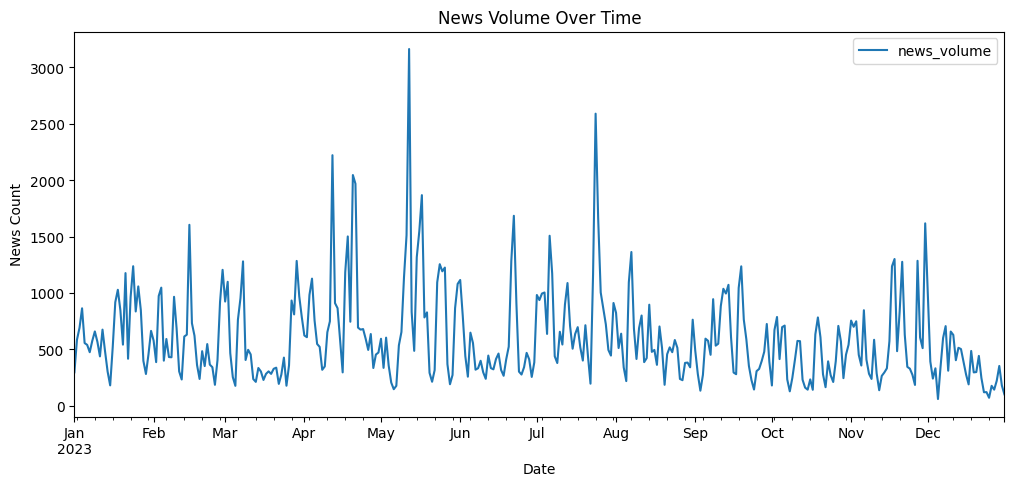

In [27]:
HEADERS = {
    'X-AYLIEN-NewsAPI-Application-ID': NEWSAPI_APP_ID,
    'X-AYLIEN-NewsAPI-Application-Key': NEWSAPI_APP_KEY
}

# Parameters for time series request
params = {
    "published_at.start": PUBLISHED_START,
    "published_at.end": PUBLISHED_END,    
    "language": "(en)", 
    "entities": '{{surface_forms:("Elon Musk") AND overall_prominence:>=0.7}}',
}

# Make request to time series endpoint
response = requests.get("https://api.aylien.com/v6/news/time_series", params=params, headers=HEADERS)

# Process response
if response.status_code == 200:
    result = response.json()
    # Print results in a readable format
    print(result)
    for interval in result.get("intervals", []):
        print(f"Date: {interval['start']}, News Volume: {interval['count']}")
else:
    print(f"Error {response.status_code}: {response.text}")

time_series = result.get("time_series", [])

# Convert to DataFrame
df = pd.DataFrame(time_series)

# Convert 'published_at' to datetime format and set as index
df['published_at'] = pd.to_datetime(df['published_at'])
df.set_index('published_at', inplace=True)

# Rename column for clarity
df.rename(columns={'count': 'news_volume'}, inplace=True)

df.plot(figsize=(12, 5), legend=True, title="News Volume Over Time")
plt.xlabel("Date")
plt.ylabel("News Count")
plt.show()

